In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 596


In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
queryURL = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    #time.sleep(1)
    #print(city) 
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
     
        #city_url = url + "appid=" + weather_api_key + "&q=" + city
    city_url = f"{queryURL}{city}"
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
        
       
    # Run an API request for each of the cities
        
        #print(response)#['weather'])#[0]['description'])
    #print(requests.get(city_url).json())
    try:
        
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        
        #city_weather = requests.get(city_url).json()
        #city_weather = response['weather'][0]['description']
        #print(response)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['weather'][0]['description']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print("city_found")
   # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
#print(city_data)


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
city_found
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | saleaula
City not found. Skipping...
Processing Record 4 of Set 1 | ribeira grande
city_found
Processing Record 5 of Set 1 | bredasdorp
city_found
Processing Record 6 of Set 1 | puerto ayora
city_found
Processing Record 7 of Set 1 | tasiilaq
city_found
Processing Record 8 of Set 1 | mar del plata
city_found
Processing Record 9 of Set 1 | mataura
city_found
Processing Record 10 of Set 1 | cidreira
city_found
Processing Record 11 of Set 1 | tateyama
city_found
Processing Record 12 of Set 1 | aklavik
city_found
Processing Record 13 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 1 | vaini
city_found
Processing Record 15 of Set 1 | esperance
city_found
Processing Record 16 of Set 1 | rikitea
city_found
Processing Record 17 of Set 1 | katherin

city_found
Processing Record 1 of Set 4 | lahij
city_found
Processing Record 2 of Set 4 | karaul
City not found. Skipping...
Processing Record 3 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 4 of Set 4 | bokspits
City not found. Skipping...
Processing Record 5 of Set 4 | vardo
city_found
Processing Record 6 of Set 4 | amderma
City not found. Skipping...
Processing Record 7 of Set 4 | raudeberg
city_found
Processing Record 8 of Set 4 | norman wells
city_found
Processing Record 9 of Set 4 | urumqi
city_found
Processing Record 10 of Set 4 | bastia
city_found
Processing Record 11 of Set 4 | lagoa
city_found
Processing Record 12 of Set 4 | valday
city_found
Processing Record 13 of Set 4 | tura
city_found
Processing Record 14 of Set 4 | guadalupe victoria
city_found
Processing Record 15 of Set 4 | hermanus
city_found
Processing Record 16 of Set 4 | ibra
city_found
Processing Record 17 of Set 4 | bolshaya murta
City not found. Skipping...
Processing Record 18 of

city_found
Processing Record 3 of Set 7 | te anau
city_found
Processing Record 4 of Set 7 | ayan
city_found
Processing Record 5 of Set 7 | bilma
city_found
Processing Record 6 of Set 7 | snasa
city_found
Processing Record 7 of Set 7 | bowral
city_found
Processing Record 8 of Set 7 | wahran
City not found. Skipping...
Processing Record 9 of Set 7 | terra santa
city_found
Processing Record 10 of Set 7 | fare
city_found
Processing Record 11 of Set 7 | bafilo
city_found
Processing Record 12 of Set 7 | gyanpur
city_found
Processing Record 13 of Set 7 | port elizabeth
city_found
Processing Record 14 of Set 7 | saint-philippe
city_found
Processing Record 15 of Set 7 | kokopo
city_found
Processing Record 16 of Set 7 | yerbogachen
city_found
Processing Record 17 of Set 7 | tautira
city_found
Processing Record 18 of Set 7 | pangnirtung
city_found
Processing Record 19 of Set 7 | jiuquan
city_found
Processing Record 20 of Set 7 | washington
city_found
Processing Record 21 of Set 7 | le havre
city_

city_found
Processing Record 7 of Set 10 | maues
city_found
Processing Record 8 of Set 10 | acapulco
city_found
Processing Record 9 of Set 10 | meulaboh
city_found
Processing Record 10 of Set 10 | muros
city_found
Processing Record 11 of Set 10 | ngukurr
City not found. Skipping...
Processing Record 12 of Set 10 | arona
city_found
Processing Record 13 of Set 10 | trairi
city_found
Processing Record 14 of Set 10 | santa cruz
city_found
Processing Record 15 of Set 10 | shihezi
city_found
Processing Record 16 of Set 10 | labutta
City not found. Skipping...
Processing Record 17 of Set 10 | ancud
city_found
Processing Record 18 of Set 10 | kazar
city_found
Processing Record 19 of Set 10 | ola
city_found
Processing Record 20 of Set 10 | povolzhskiy
city_found
Processing Record 21 of Set 10 | surt
city_found
Processing Record 22 of Set 10 | mullovka
city_found
Processing Record 23 of Set 10 | kindu
city_found
Processing Record 24 of Set 10 | attawapiskat
City not found. Skipping...
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,18.50,82,overcast clouds,1.47,TL,1678062344
1,ribeira grande,38.5167,-28.7000,14.81,69,broken clouds,8.57,PT,1678062345
2,bredasdorp,-34.5322,20.0403,18.50,85,moderate rain,5.10,ZA,1678062336
3,puerto ayora,-0.7393,-90.3518,26.42,91,scattered clouds,2.24,EC,1678062323
4,tasiilaq,65.6145,-37.6368,-4.91,88,scattered clouds,1.90,GL,1678062330


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,18.50,82,overcast clouds,1.47,TL,1678062344
1,ribeira grande,38.5167,-28.7000,14.81,69,broken clouds,8.57,PT,1678062345
2,bredasdorp,-34.5322,20.0403,18.50,85,moderate rain,5.10,ZA,1678062336
3,puerto ayora,-0.7393,-90.3518,26.42,91,scattered clouds,2.24,EC,1678062323
4,tasiilaq,65.6145,-37.6368,-4.91,88,scattered clouds,1.90,GL,1678062330


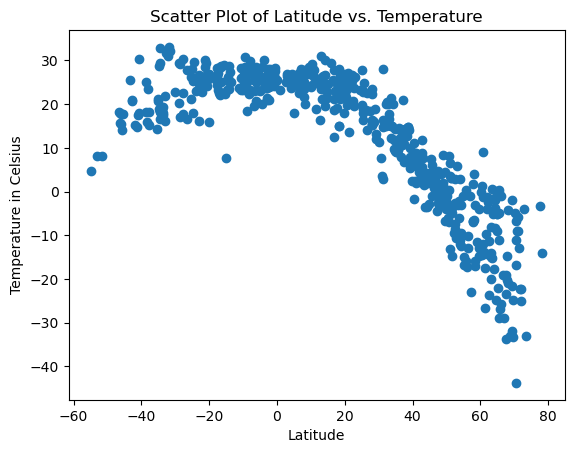

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature in Celsius")
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

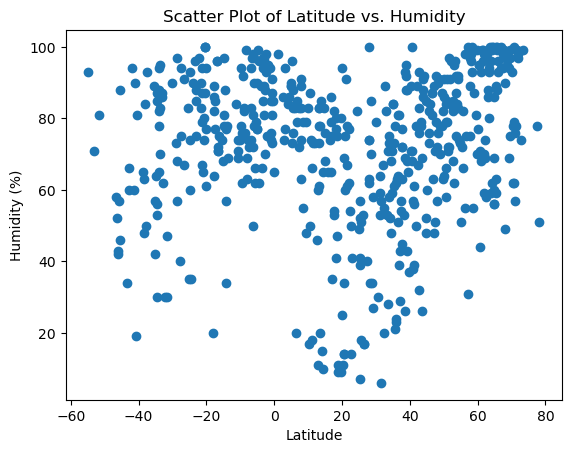

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

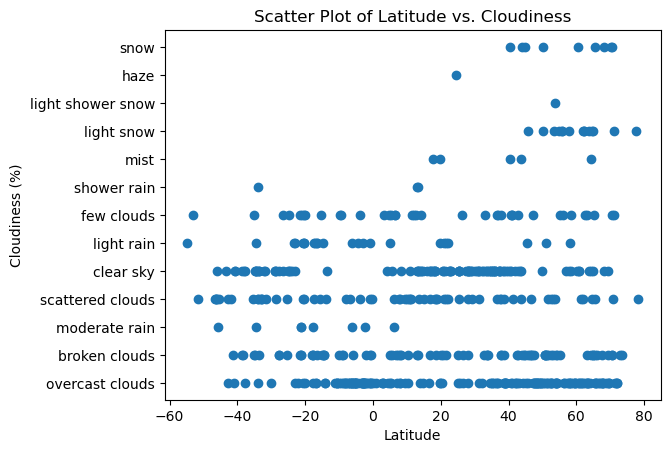

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

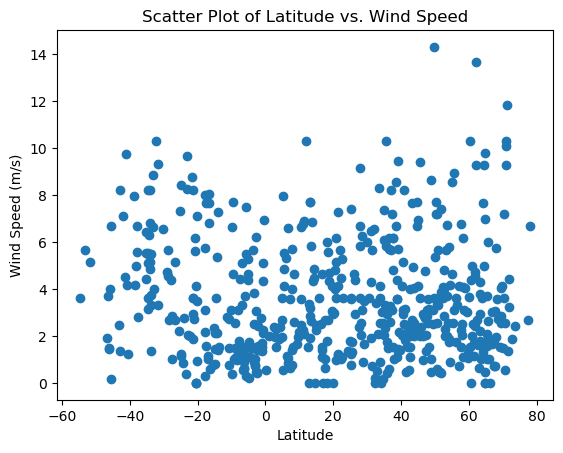

In [12]:
# Build scatter plot for latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()